### K nearest neighbor

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score

### Preprocessing

In [40]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [41]:
df['class'].value_counts()

class
2    180
3    173
1     87
Name: count, dtype: int64

In [42]:
X=df.drop(columns=['class'])
y=df['class']
smote=SMOTE(k_neighbors=3,random_state=18)
X,y=smote.fit_resample(X,y)

In [43]:
pd.DataFrame(y).value_counts()

class
1        180
2        180
3        180
Name: count, dtype: int64

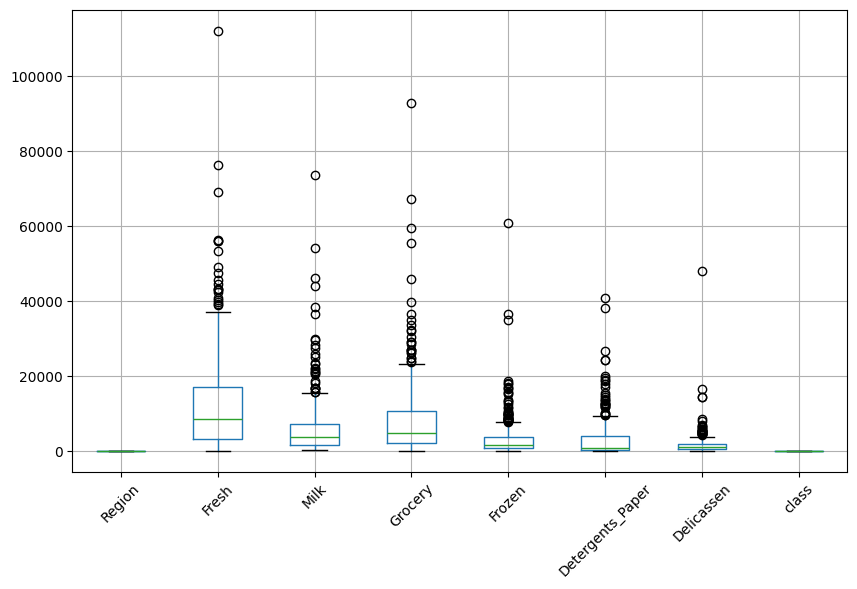

In [44]:
df.boxplot(figsize=(10,6), rot=45)
plt.show()


In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=18)

In [46]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

y_test,y_train=np.array(y_test),np.array(y_train)

### KNN Scratch implementation

In [ ]:
class Knn:
    def __init__(self,k=3):
        self.k=k
    def fit(self,x_train,y_train):
        self.X_train=np.array(x_train)
        self.y_train=np.array(y_train)
    def euclidean_dist(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    def predict(self,X):
        predictions=[self._predict(x) for x in X]
        return predictions
    def _predict(self,X):
        distances=[self.euclidean_dist(X,x_train) for x_train in self.X_train]
        
        k_indices=np.argsort(distances)[:self.k]
        k_labels=[self.y_train[i] for i in k_indices]
        
        most_common=Counter(k_labels).most_common(1)
        
        return most_common[0][0]

In [48]:
model=Knn(k=5)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)
y_pred

[np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.in

In [56]:
k_values=range(1,21,2)
scores={}
for k in k_values:
    model = Knn(k=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[k] = acc
    print(f"k={k}, accuracy={acc:.4f}")

best_k = max(scores, key=scores.get)
print("Best k:", best_k, "with accuracy:", scores[best_k])

k=1, accuracy=0.8426
k=3, accuracy=0.8333
k=5, accuracy=0.8333
k=7, accuracy=0.8611
k=9, accuracy=0.9074
k=11, accuracy=0.8981
k=13, accuracy=0.8796
k=15, accuracy=0.8426
k=17, accuracy=0.8519
k=19, accuracy=0.8426
Best k: 9 with accuracy: 0.9074074074074074


In [69]:
model=Knn(k=9)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.85      0.94      0.89        35
           2       0.94      0.87      0.91        39
           3       0.94      0.91      0.93        34

    accuracy                           0.91       108
   macro avg       0.91      0.91      0.91       108
weighted avg       0.91      0.91      0.91       108



### Sklearn implementation

In [60]:
k_values=range(1,21,2)
scores={}
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[k] = acc
    print(f"k={k}, accuracy={acc:.4f}")

best_k = max(scores, key=scores.get)
print("Best k:", best_k, "with accuracy:", scores[best_k])

k=1, accuracy=0.8426
k=3, accuracy=0.8333
k=5, accuracy=0.8426
k=7, accuracy=0.8611
k=9, accuracy=0.8889
k=11, accuracy=0.8889
k=13, accuracy=0.8611
k=15, accuracy=0.8426
k=17, accuracy=0.8519
k=19, accuracy=0.8426
Best k: 9 with accuracy: 0.8888888888888888


In [72]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [73]:
y_pred1=knn.predict(X_test)


In [74]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.80      0.94      0.87        35
           2       0.94      0.85      0.89        39
           3       0.94      0.88      0.91        34

    accuracy                           0.89       108
   macro avg       0.90      0.89      0.89       108
weighted avg       0.90      0.89      0.89       108

